In [1]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [2]:
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable$biological=factor(sampleTable$biological)
sampleTable$technical=factor(sampleTable$technical)
sampleTable$sample_type=factor(sampleTable$sample_type)
sampleTable$sample_type2=factor(sampleTable$sample_type2)
sampleTable$sample_type <- relevel(sampleTable$sample_type, ref="unenriched")
sampleTable$sample_type2 <- relevel(sampleTable$sample_type2, ref="unenriched")
sampleTable

,biological,technical,unenriched,probe,sample_type,sample_type2,sample_name,path
Neg1rep1,1,1,FALSE,FALSE,neg,probe,neg1,data/Neg1rep1/DTASelect-filter.txt
unenriched1,1,1,TRUE,FALSE,unenriched,unenriched,unenriched1,data/unenriched1/DTASelect-filter.txt
unenriched2,2,1,TRUE,FALSE,unenriched,unenriched,unenriched2,data/unenriched2/DTASelect-filter.txt
unenriched3,3,1,TRUE,FALSE,unenriched,unenriched,unenriched3,data/unenriched3/DTASelect-filter.txt
VK1rep1,1,1,FALSE,TRUE,probe,probe,vk1,data/VK1rep1/DTASelect-filter.txt
VK3rep1,1,1,FALSE,TRUE,probe,probe,vk3,data/VK3rep1/DTASelect-filter.txt
VK5rep1,1,1,FALSE,TRUE,probe,probe,vk5,data/VK5rep1/DTASelect-filter.txt


In [3]:
countData = read.csv("out/df_filt.csv", row.names = 1)
sampleTable = sampleTable[colnames(countData),]

In [4]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type + biological)
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


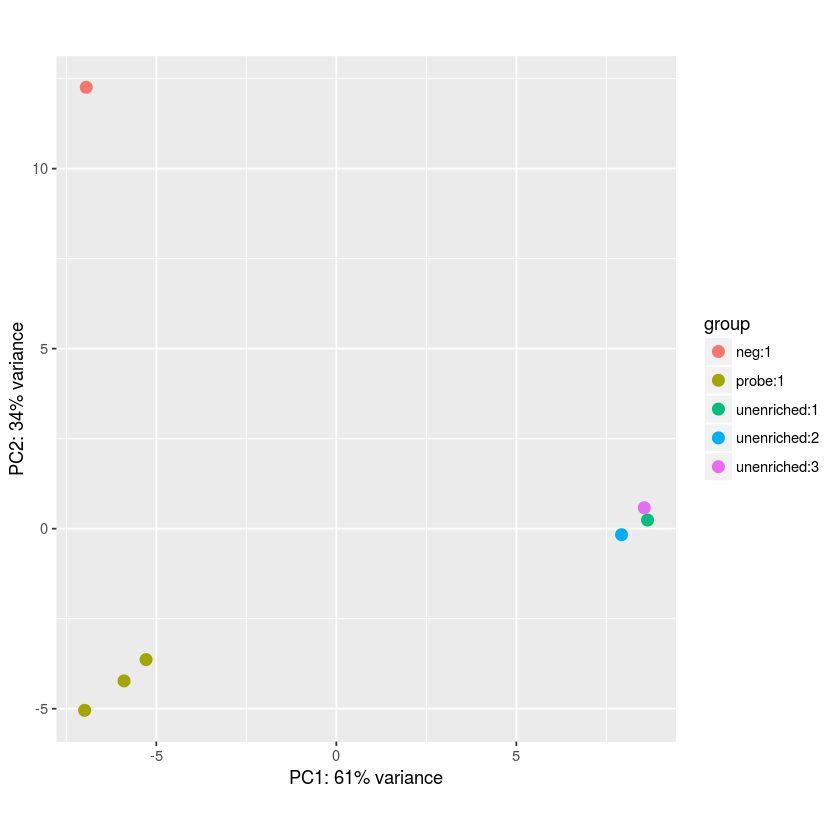

In [5]:
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(vsd, intgroup=c("sample_type", "biological"))

In [6]:
# write out normalize, transformed count matrix
write.csv(getVarianceStabilizedData(dds), "out/df_norm_transformed.csv")

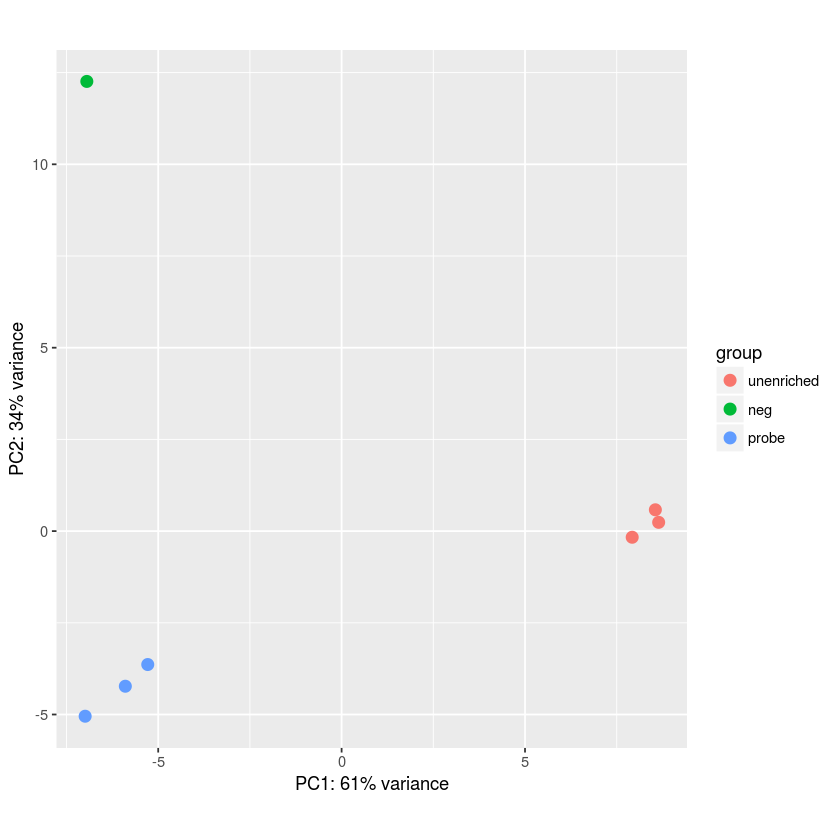

In [7]:
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(vsd, intgroup=c("sample_type"))

In [8]:
# subtract the neg samples
countData = counts(dds)
countData[,"VK1rep1"] = countData[,"VK1rep1"] - countData[,"Neg1rep1"]
countData[,"VK3rep1"] = countData[,"VK3rep1"] - countData[,"Neg1rep1"]
countData[,"VK5rep1"] = countData[,"VK5rep1"] - countData[,"Neg1rep1"]
countData[countData<0] = 0
### get rid of the neg samples
non_neg = rownames(sampleTable[sampleTable$sample_type != "neg",])
countData = countData[,non_neg]
sampleTable = sampleTable[non_neg,]

In [9]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type)

converting counts to integer mode
factor levels were dropped which had no samples


In [10]:
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [11]:
# write out count matrix
write.csv(counts(dds), "out/df_subtract.csv")
write.csv(counts(dds, normalized=TRUE), "out/df_subtract_norm.csv")
write.csv(getVarianceStabilizedData(dds), "out/df_subtract_norm_transformed.csv")

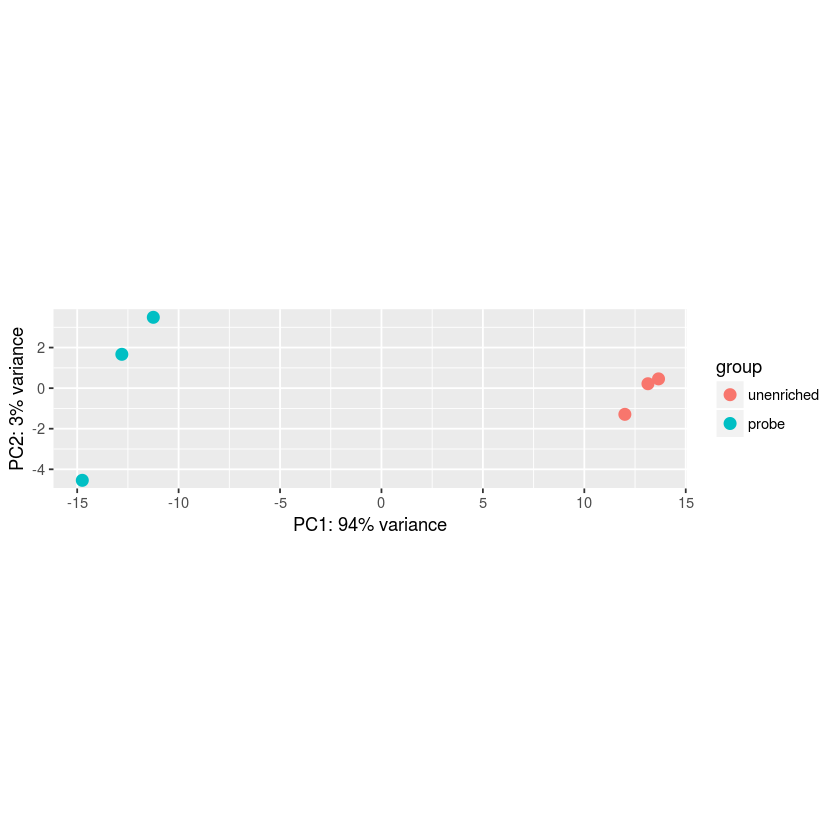

In [12]:
vsd <- vst(dds)
plotPCA(vsd, intgroup=c("sample_type"))